In [1]:
from core import process, ModelEnum
hier_arr, total_num = process("/Users/sherryyang/Documents/wiggins-lab/data/test_phase", hypermodel=ModelEnum.OMNIPOSE, submodel = 'bact_phase_omni')

2024-01-08 03:11:58,918 [INFO] ** TORCH GPU version installed and working. **
2024-01-08 03:11:58,919 [INFO] >>bact_phase_omni<< model set to be used
2024-01-08 03:11:58,919 [INFO] ** TORCH GPU version installed and working. **
2024-01-08 03:11:58,920 [INFO] >>>> using GPU


/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-01-08 03:12:06,362 [INFO] 100%|##########| 21/21 [00:07<00:00,  2.90it/s]
2024-01-08 03:12:06,362 [INFO] Segementation: predicting fields finish.
2024-01-08 03:12:15,997 [INFO] Segementation hierarchy builded.


In [2]:
total_num

323

In [8]:
import numpy as np

sub_coords = [[1,1, 3], [-1,1, 3], [0,0, 3]]
bound = np.vstack((np.min(sub_coords, axis=0), np.max(sub_coords, axis=0))).T

In [9]:
bound

array([[-1,  1],
       [ 0,  1],
       [ 3,  3]])

In [5]:
from tracking import solve
nodes, edges, weights = solve(hier_arr, seg_num = total_num, cost_func_name = "overlap")

2024-01-08 03:14:32,199 [INFO] Start building up problem


/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2024-01-08 03:14:32,826 [INFO] 4303
2024-01-08 03:14:32,827 [INFO] Start solving problem
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-07
2024-01-08 03:14:32,900 [INFO] MIP problem be set up, start solving
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.0.0 23A344)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4516 rows, 10147 columns and 19054 nonzeros
Model fingerprint: 0x5834399f
Variable types: 0 continuous, 10147 integer (10147 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -4.5000000
Presolve removed 375 rows and 1846 columns


In [5]:
from tracking import make_end_exception
make_end_exception(hier_arr, total_num)


(array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]))

In [4]:
nodes

LinExprTensor([<mip.entities.Var object at 0x28929a500>,
               <mip.entities.Var object at 0x28920bdc0>], dtype=object)

In [9]:
import mip
import config
import logging
import numpy as np
from scipy.sparse import csr_matrix
from cost import cost_funcs


weight_matrix = csr_matrix((10,10), dtype=float)
weight_matrix[1,2] = 1
weight_matrix[1,3] = 2
weight_matrix[1,4] = 3
weight_matrix[4,1] = 4
weight_matrix[5,1] = 5

/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [5]:
rows, cols = weights.nonzero() 
target_indices = np.where(rows == 1)[0]
source_indices = np.where(cols == 1)[0]

In [14]:
weight_matrix.data * (0,1,1,2,2)

array([ 0.,  2.,  3.,  8., 10.])

In [17]:
np.array([0,1,1,2,2])[source_indices]

array([2, 2])

In [11]:
target_indices

array([0, 1, 2])

In [3]:
import time

start_time = time.time()

for i in range(100):
    for j in range(100):
        result = i * j

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.0004820823669433594 seconds


In [6]:
import numpy as np

n = np.asarray(
    [i for i, node in enumerate(nodes) if node.x > 0.5], dtype=int
)

e = np.asarray(
    [i for i, edge in enumerate(edges) if edge.x > 0.5], dtype=int
)

In [10]:
len(weights.data)

117179

In [12]:
weights.data

array([0.31733333, 0.30214205, 0.2260274 , ..., 0.02011494, 0.00549451,
       0.43324251])

In [9]:
len(rows)

6164

In [8]:
e

array([     0,      1,      2, ..., 117176, 117177, 117178])

In [6]:
n

array([  0,   1,  57,  58,  60,  62,  67,  83,  87,  88, 159, 171, 180,
       183, 192, 195, 203, 209, 210, 231])

In [7]:
set(n)

{0,
 1,
 57,
 58,
 60,
 62,
 67,
 83,
 87,
 88,
 159,
 171,
 180,
 183,
 192,
 195,
 203,
 209,
 210,
 231}

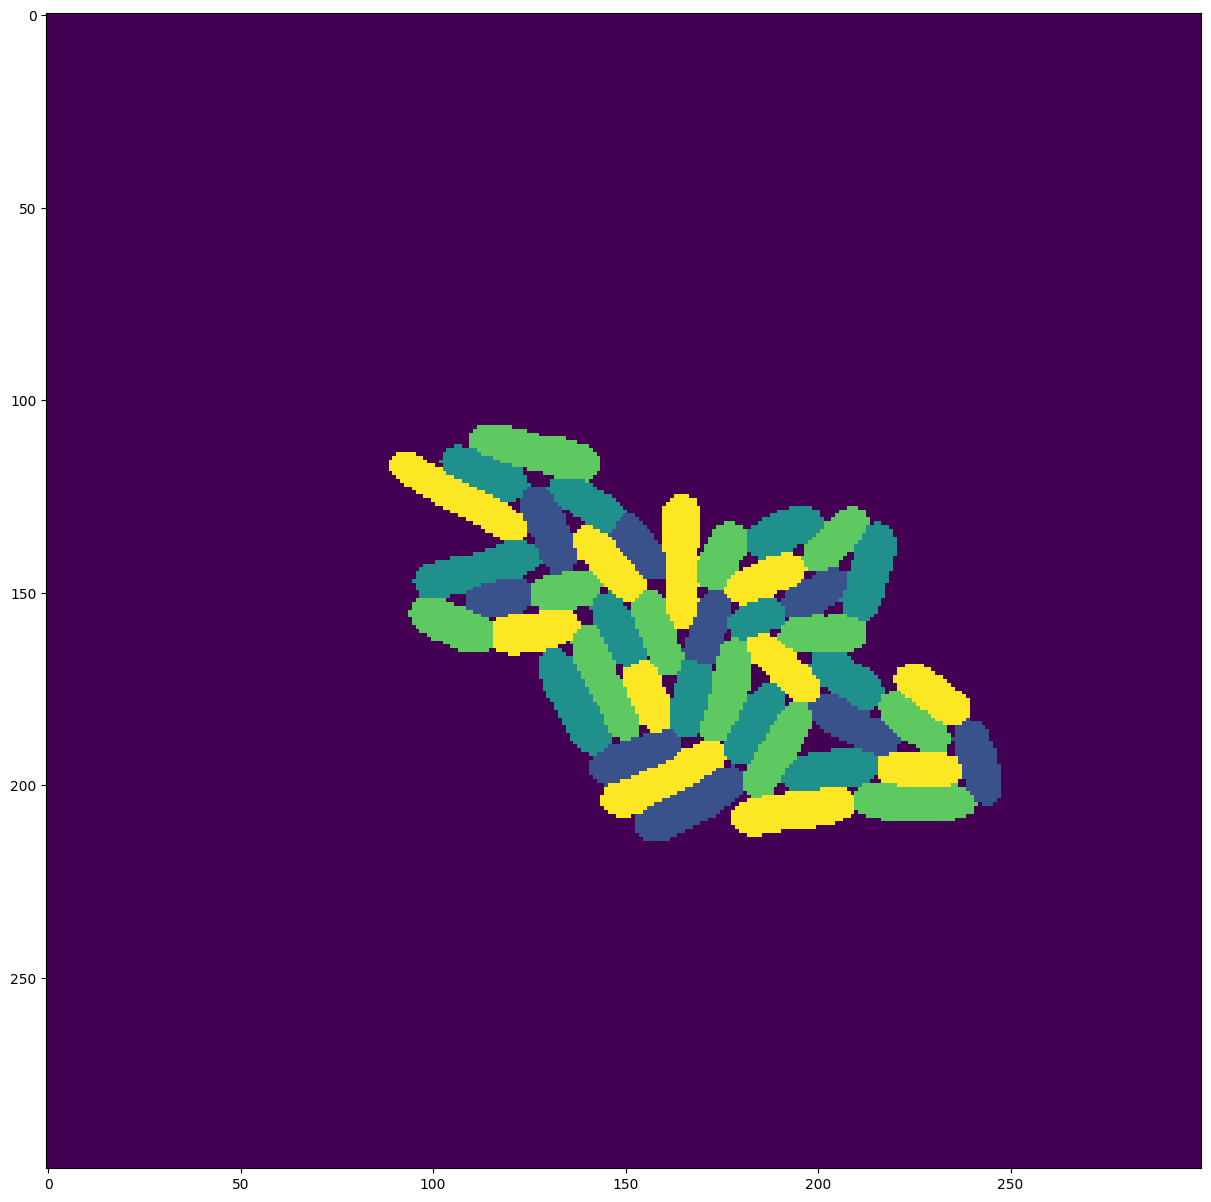

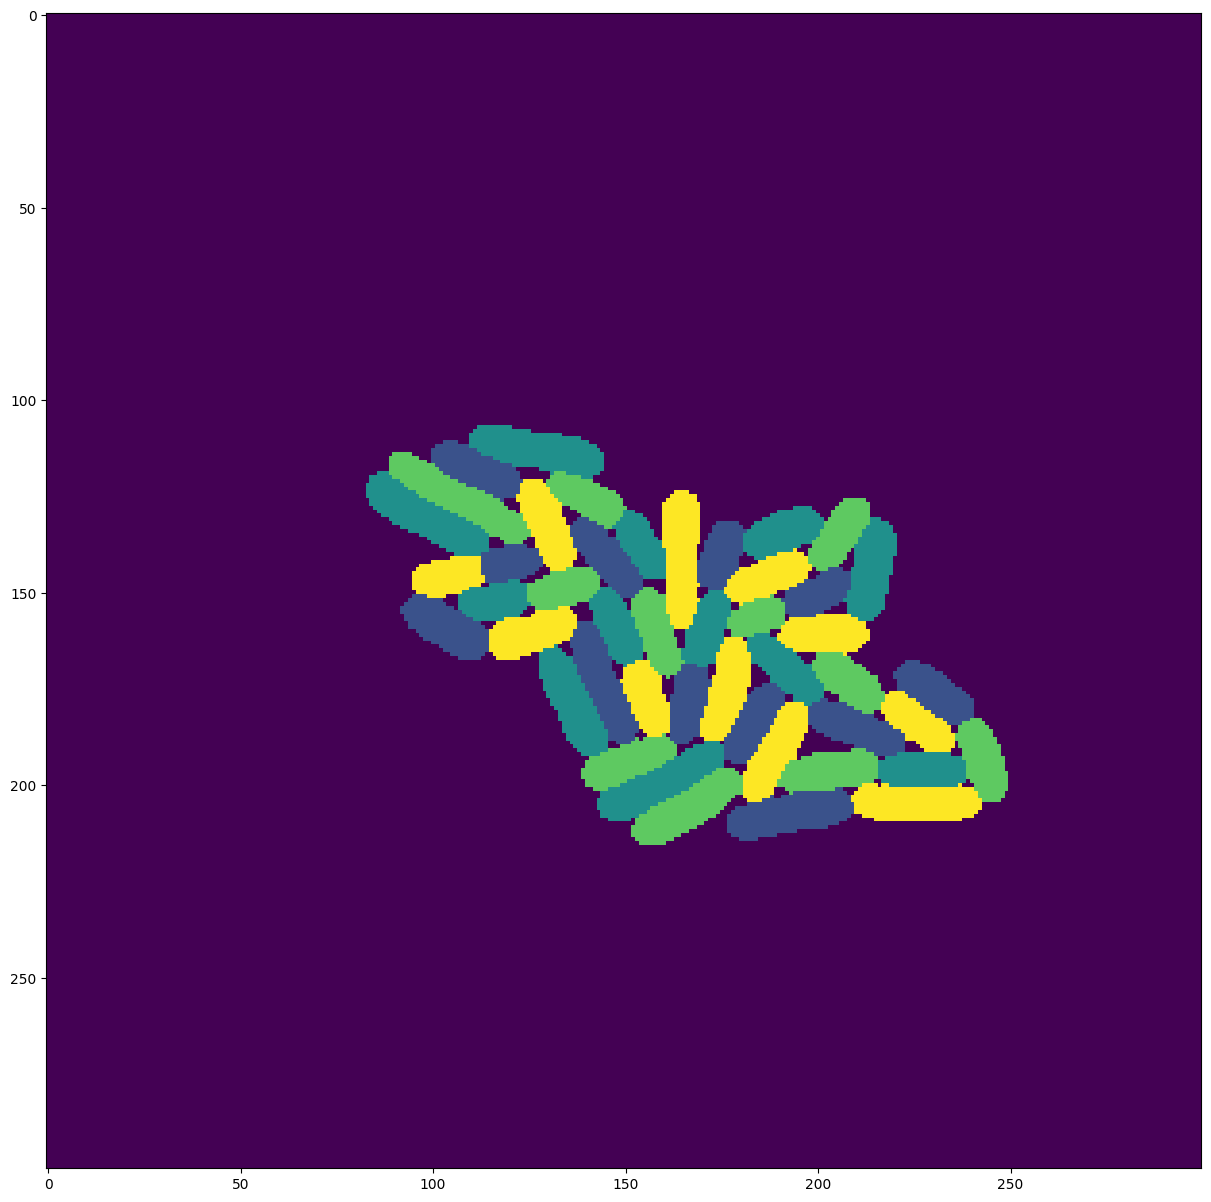

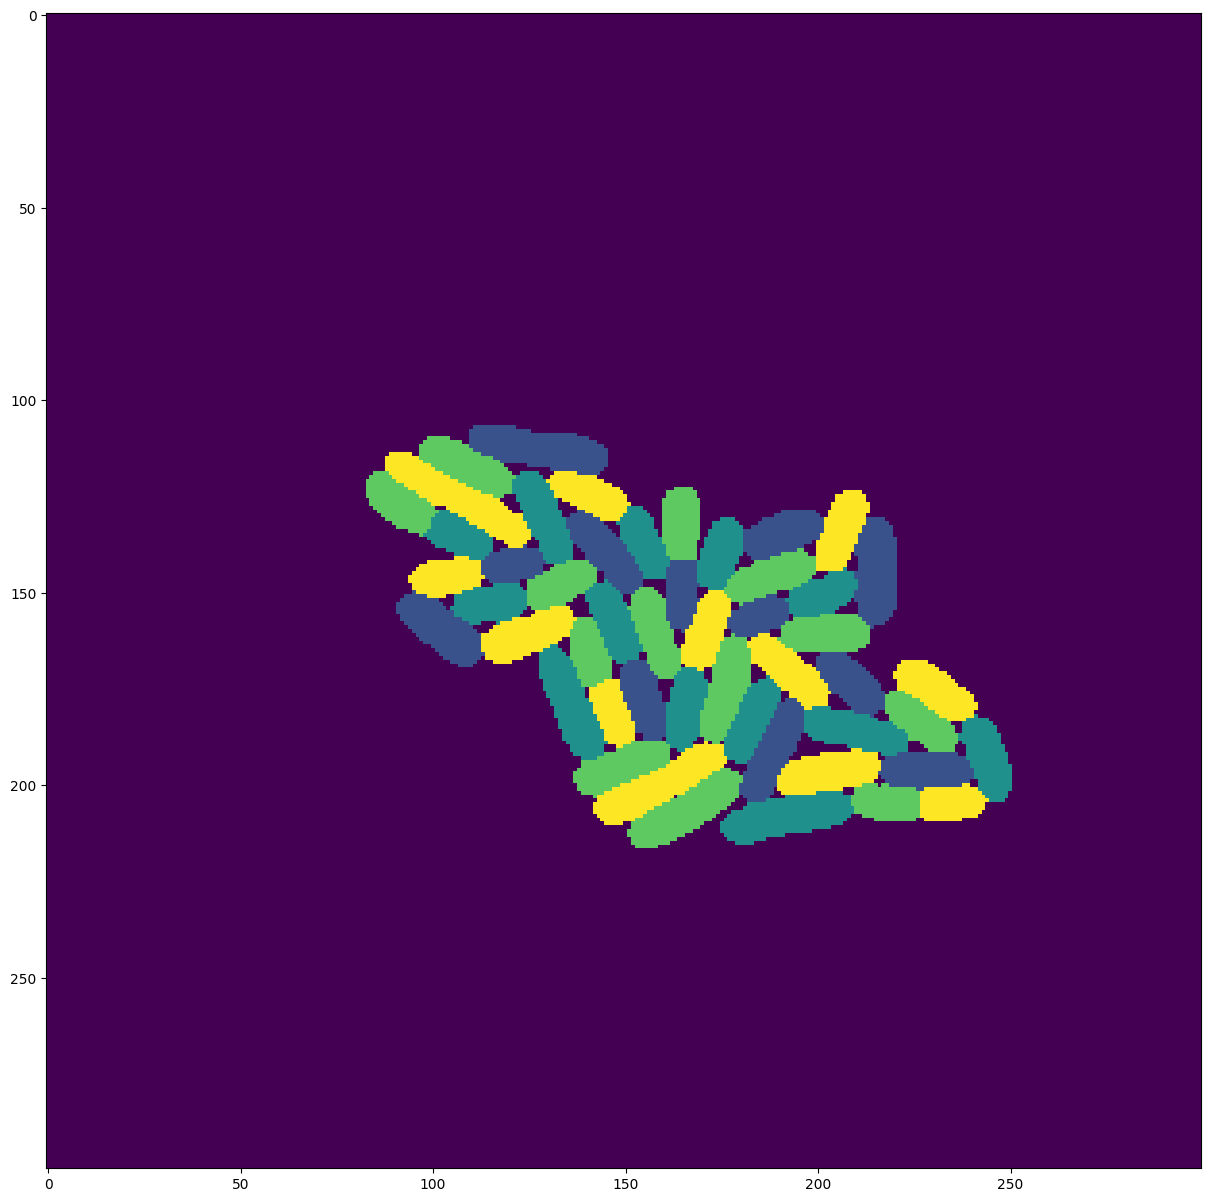

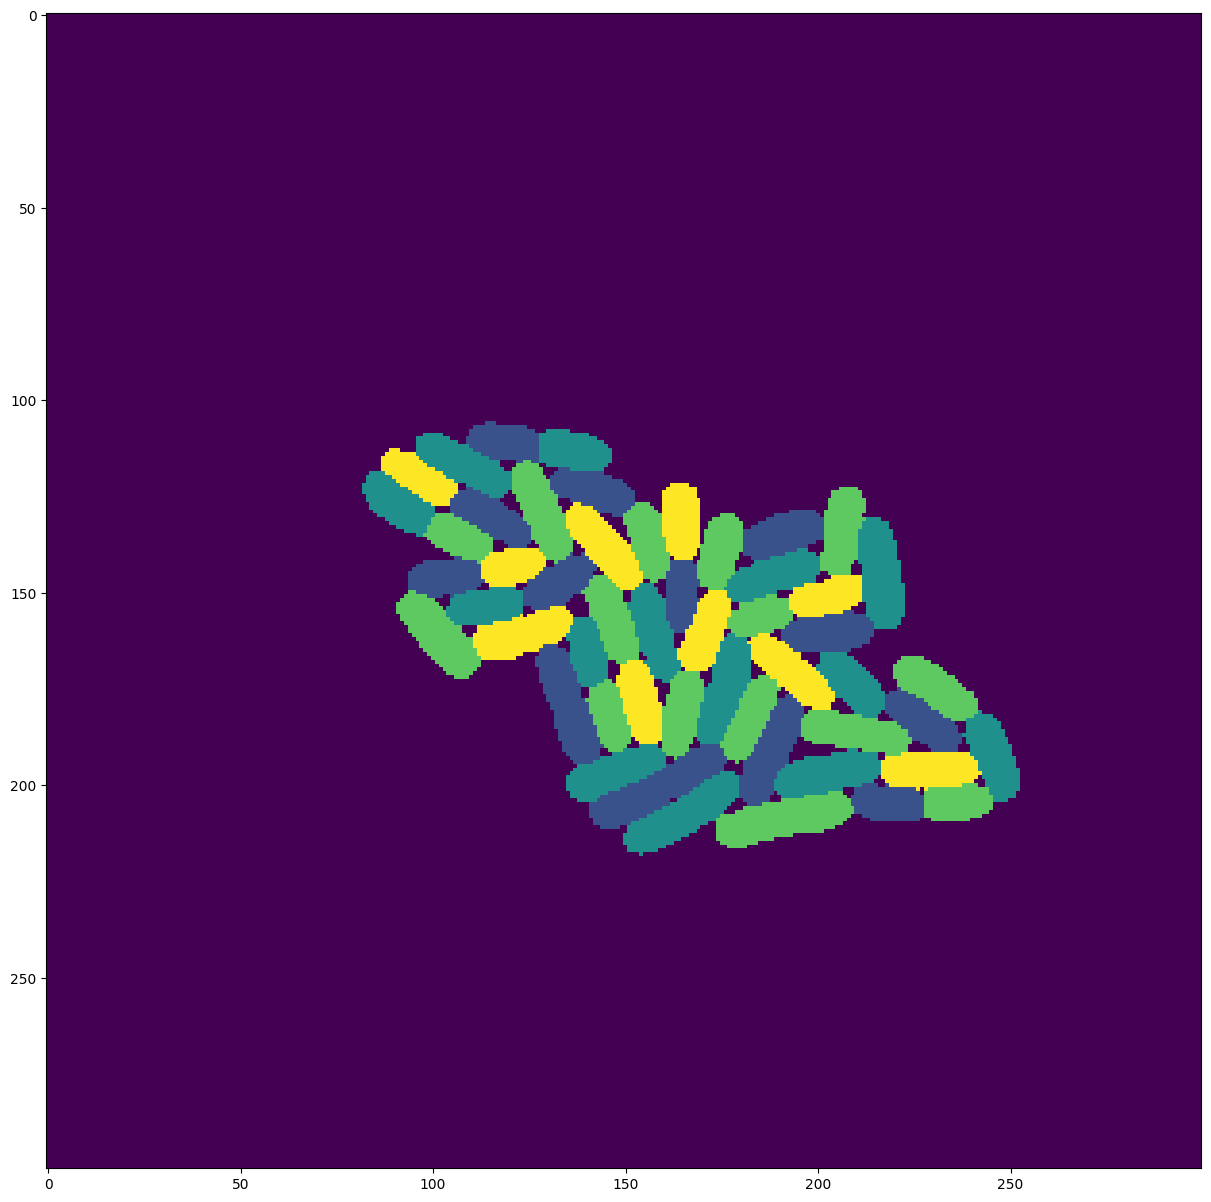

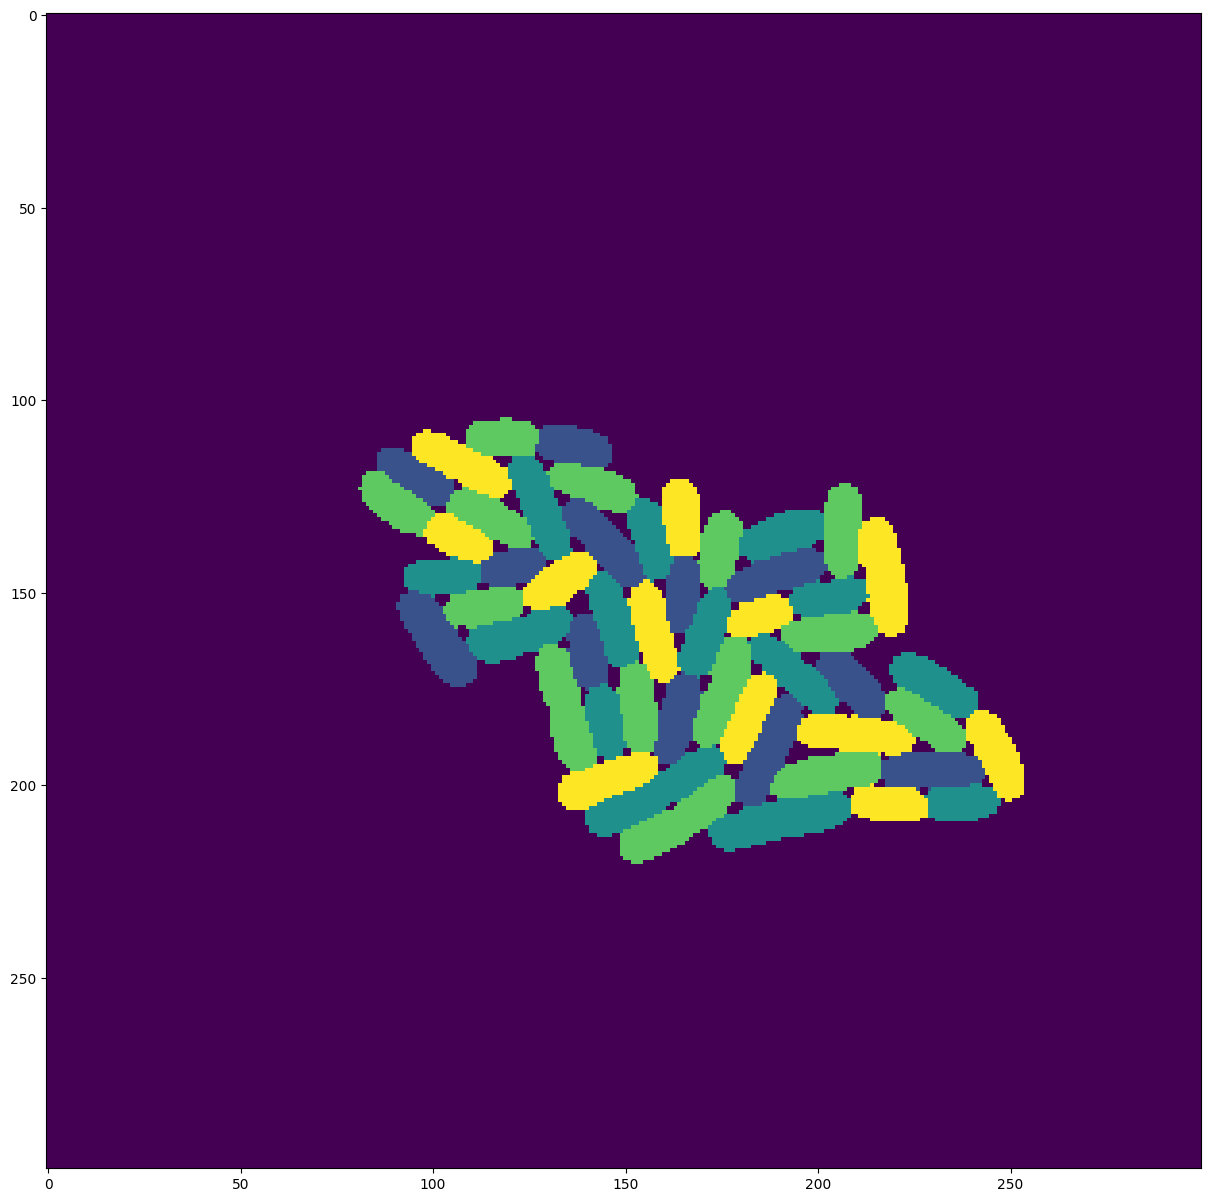

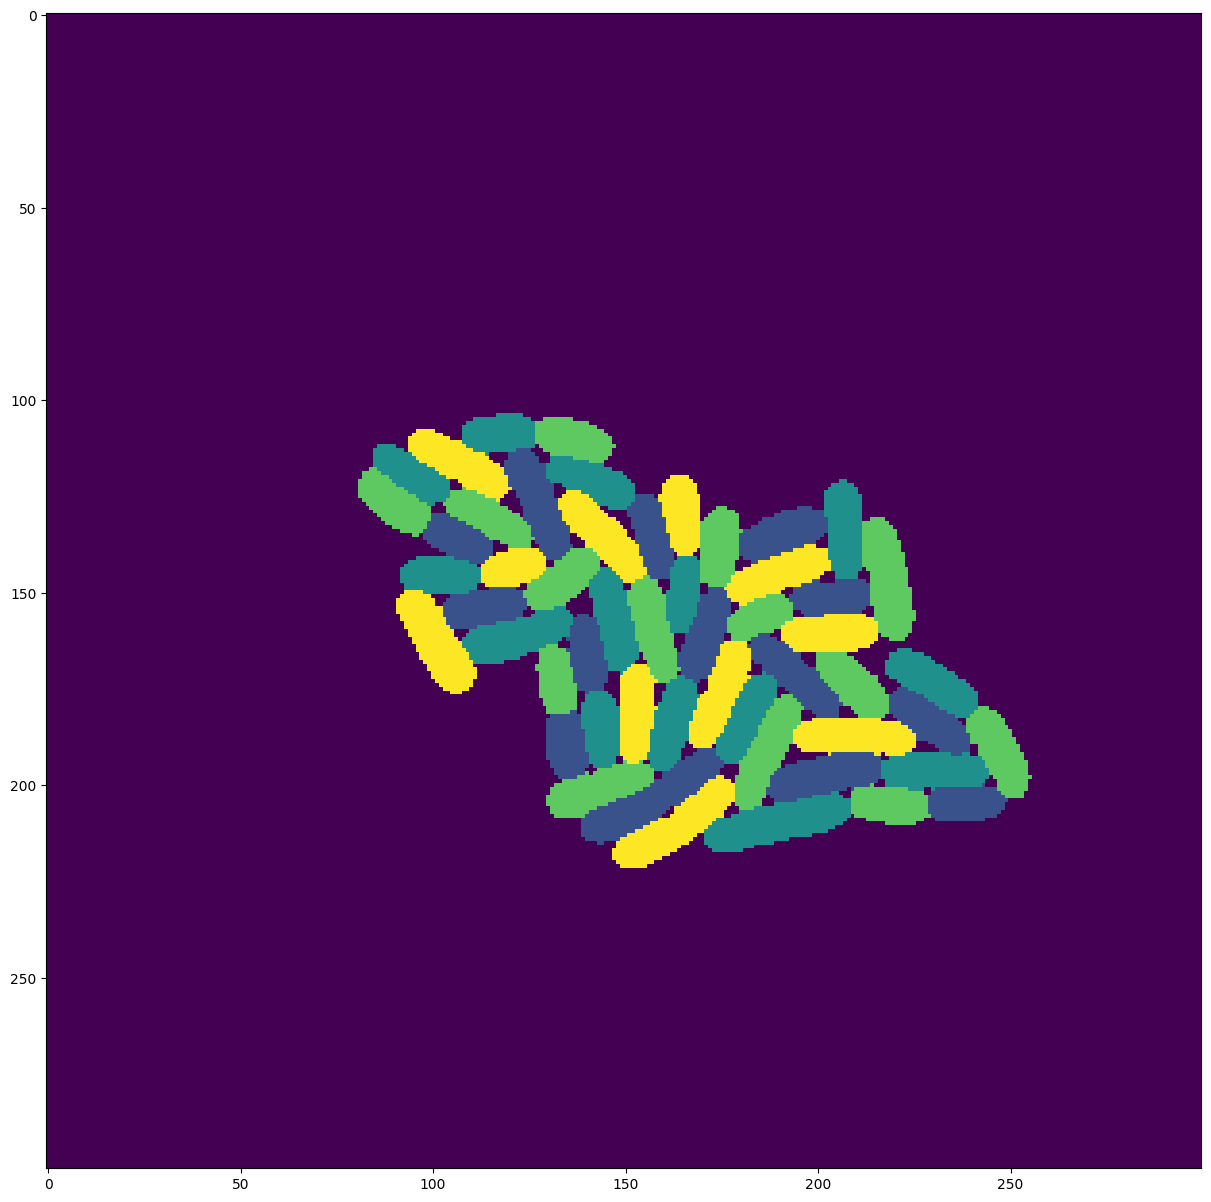

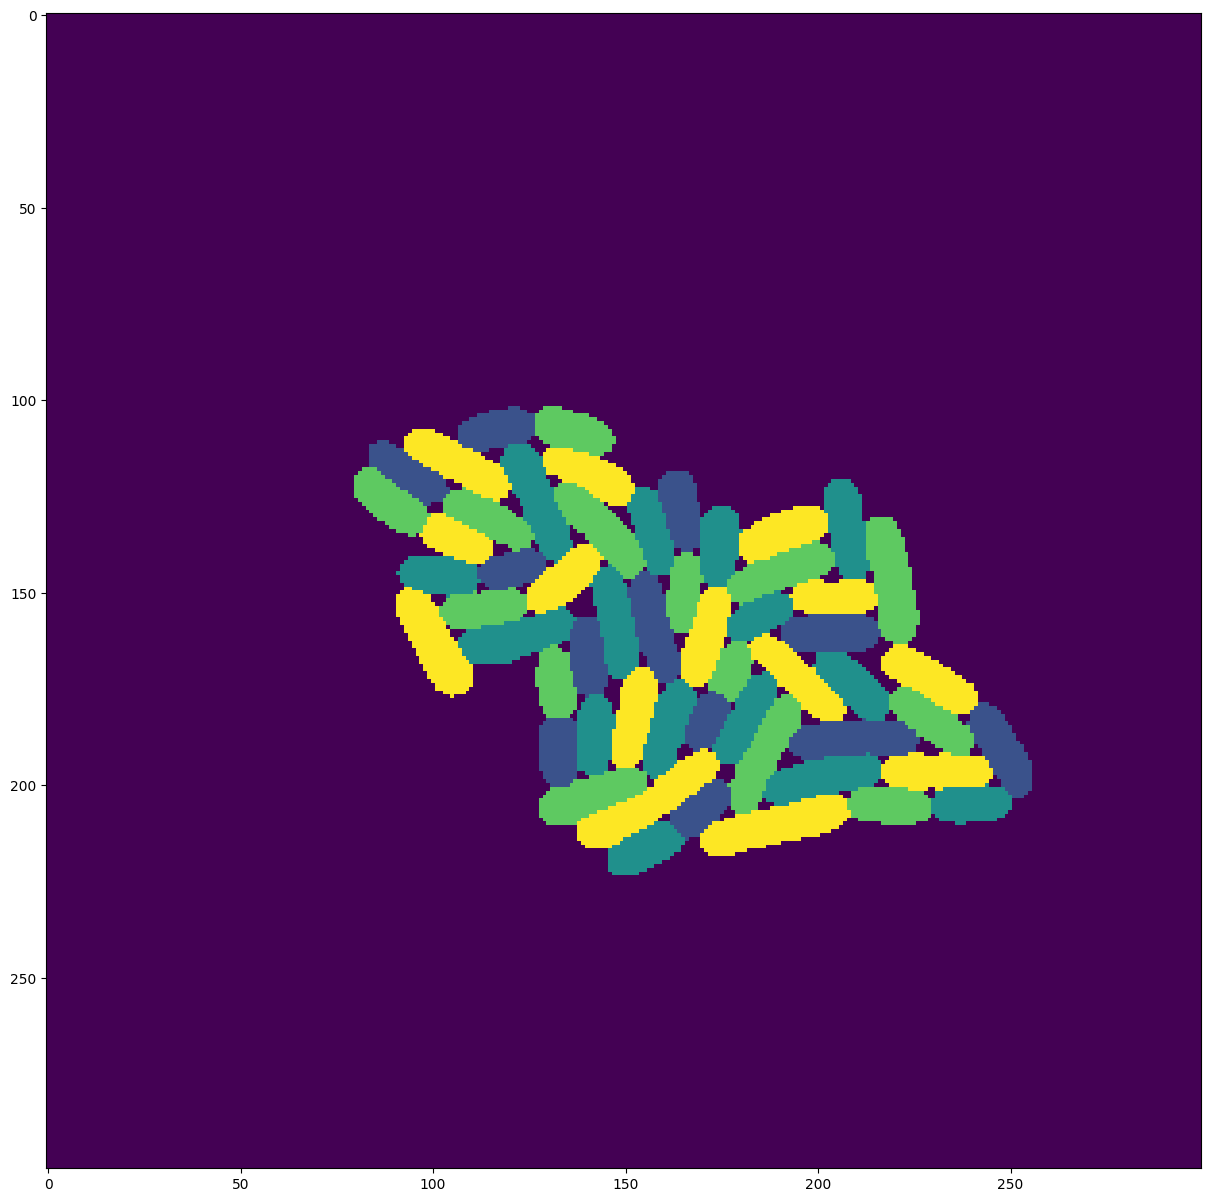

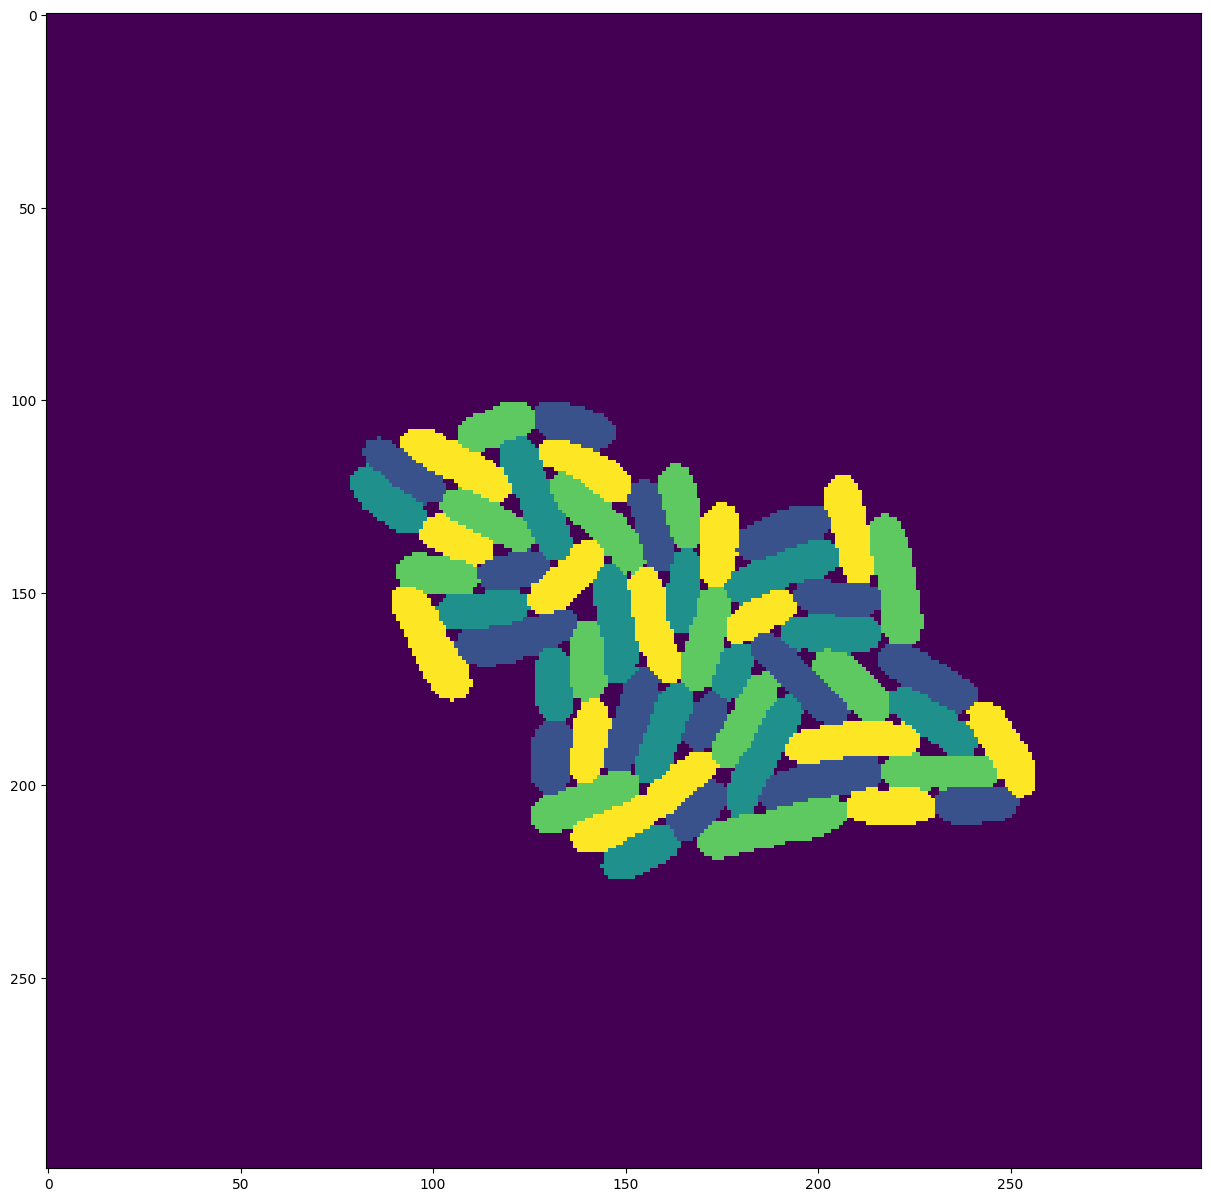

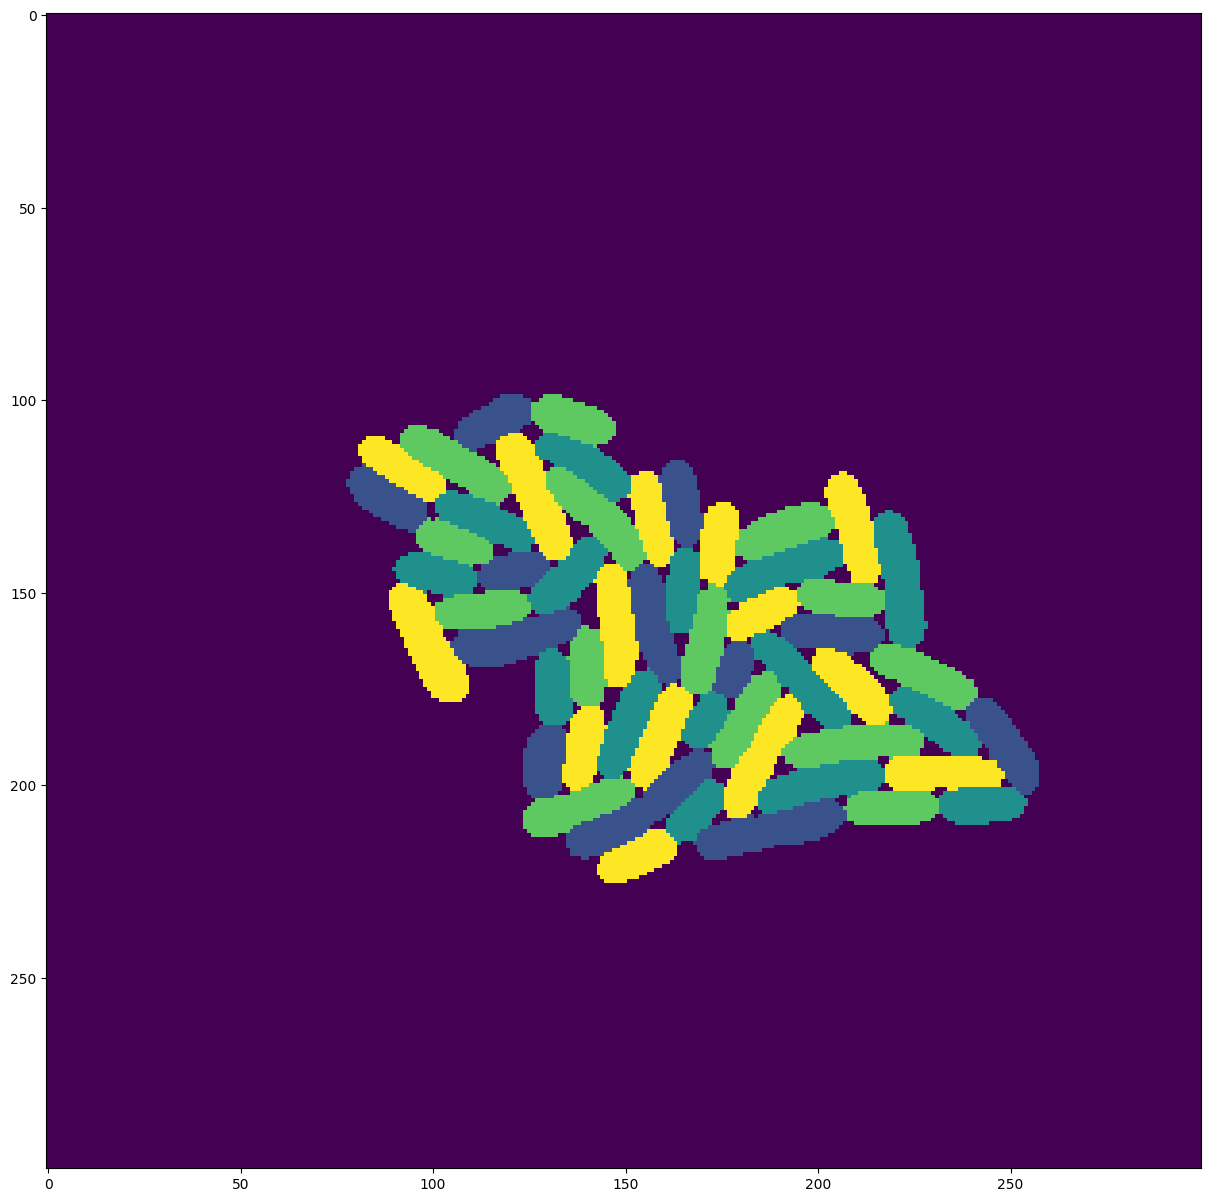

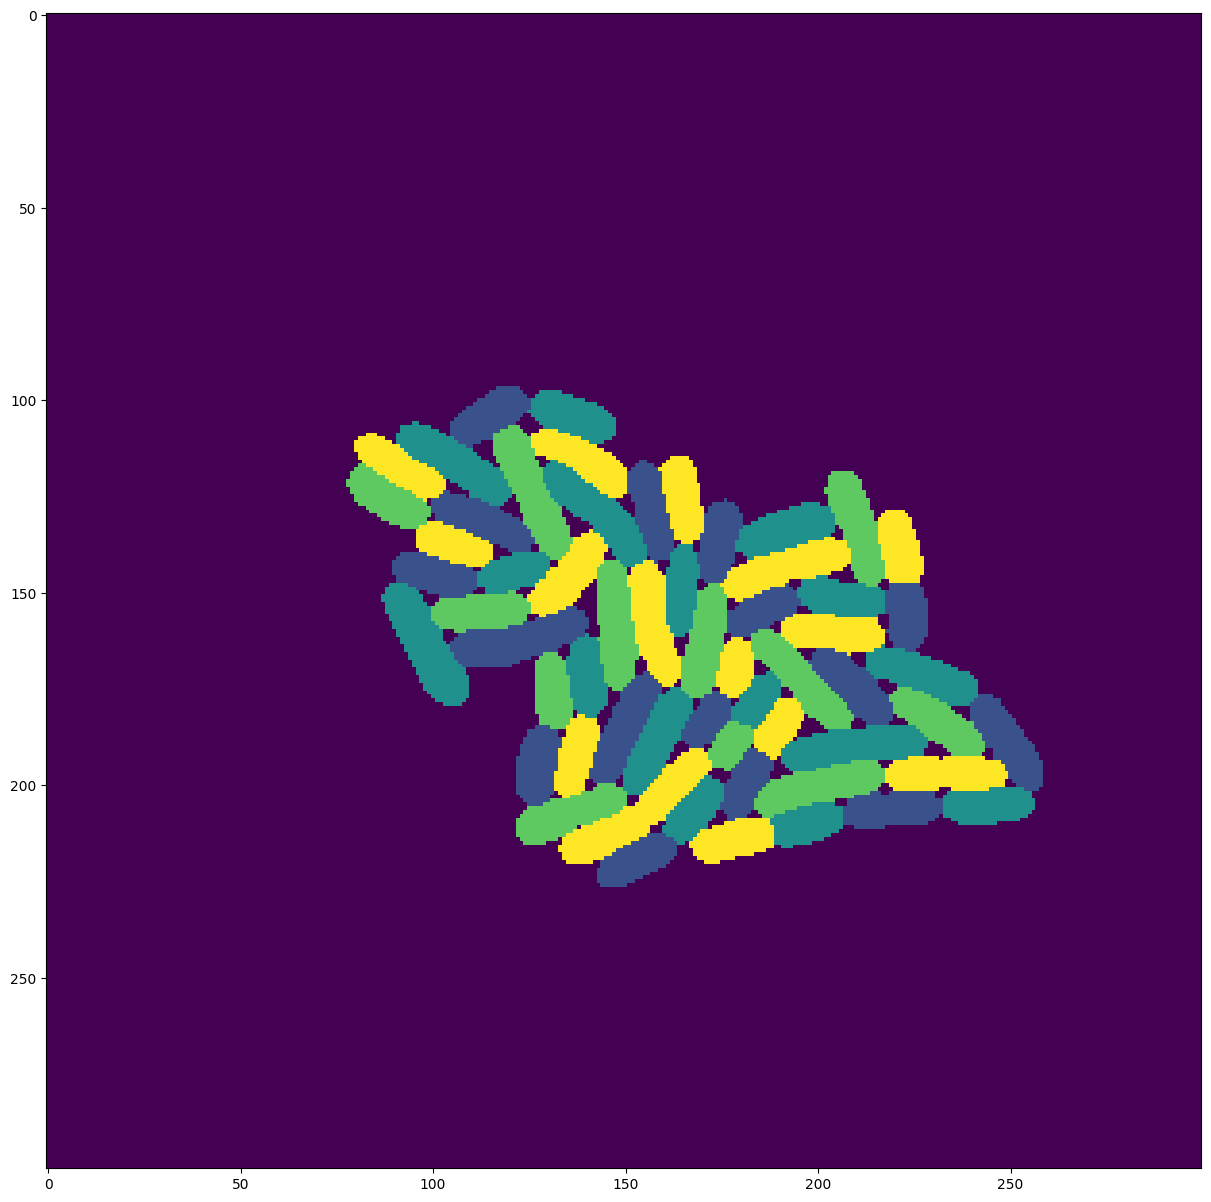

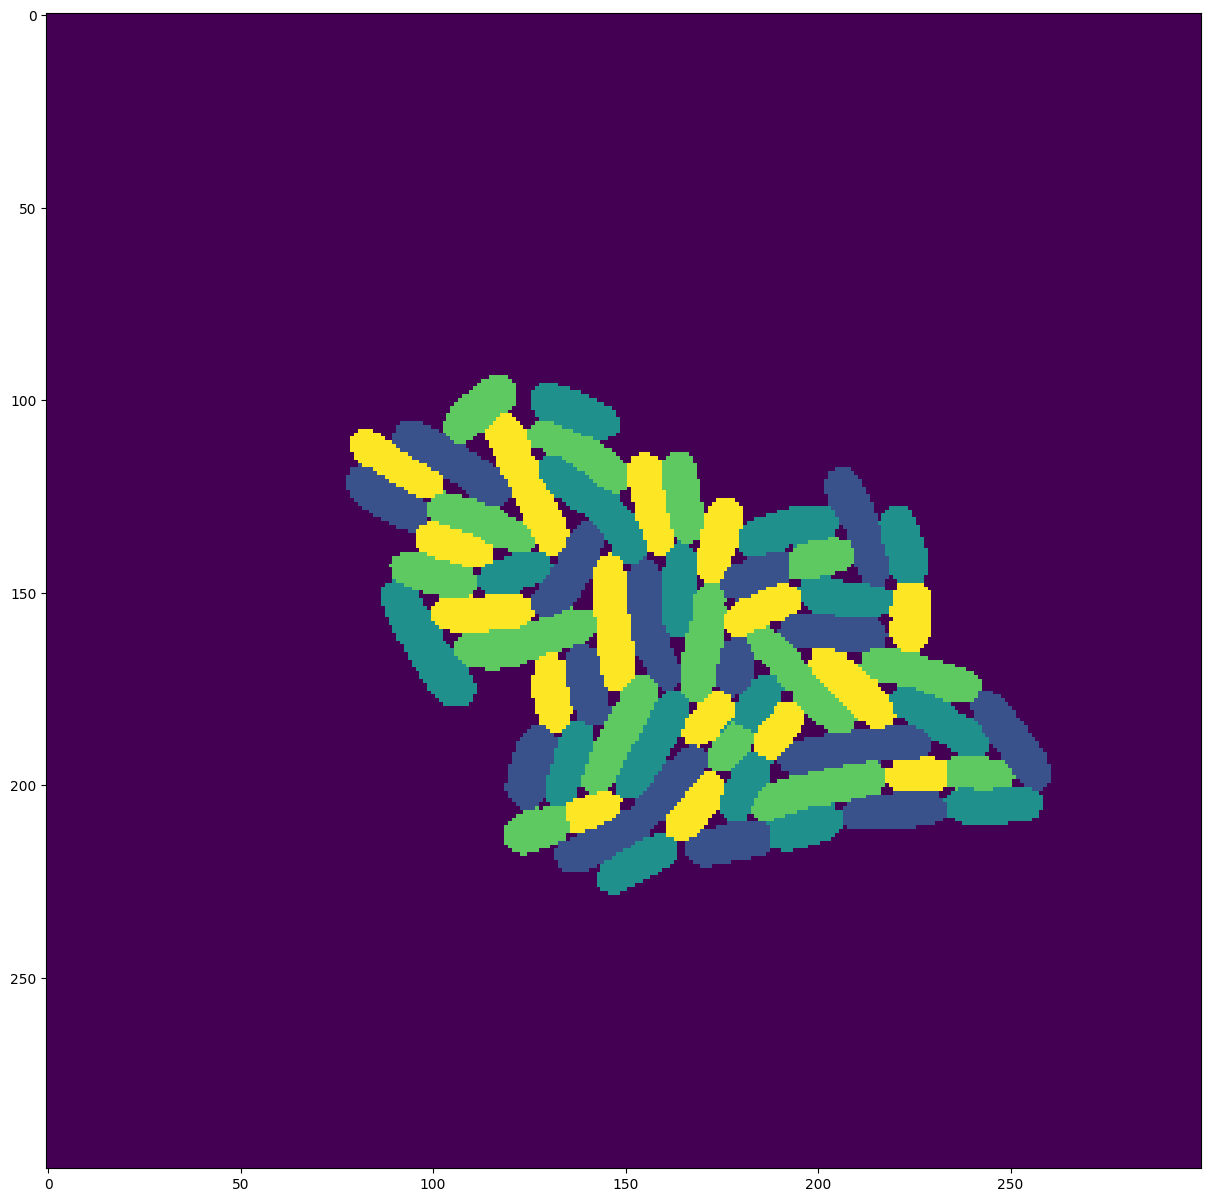

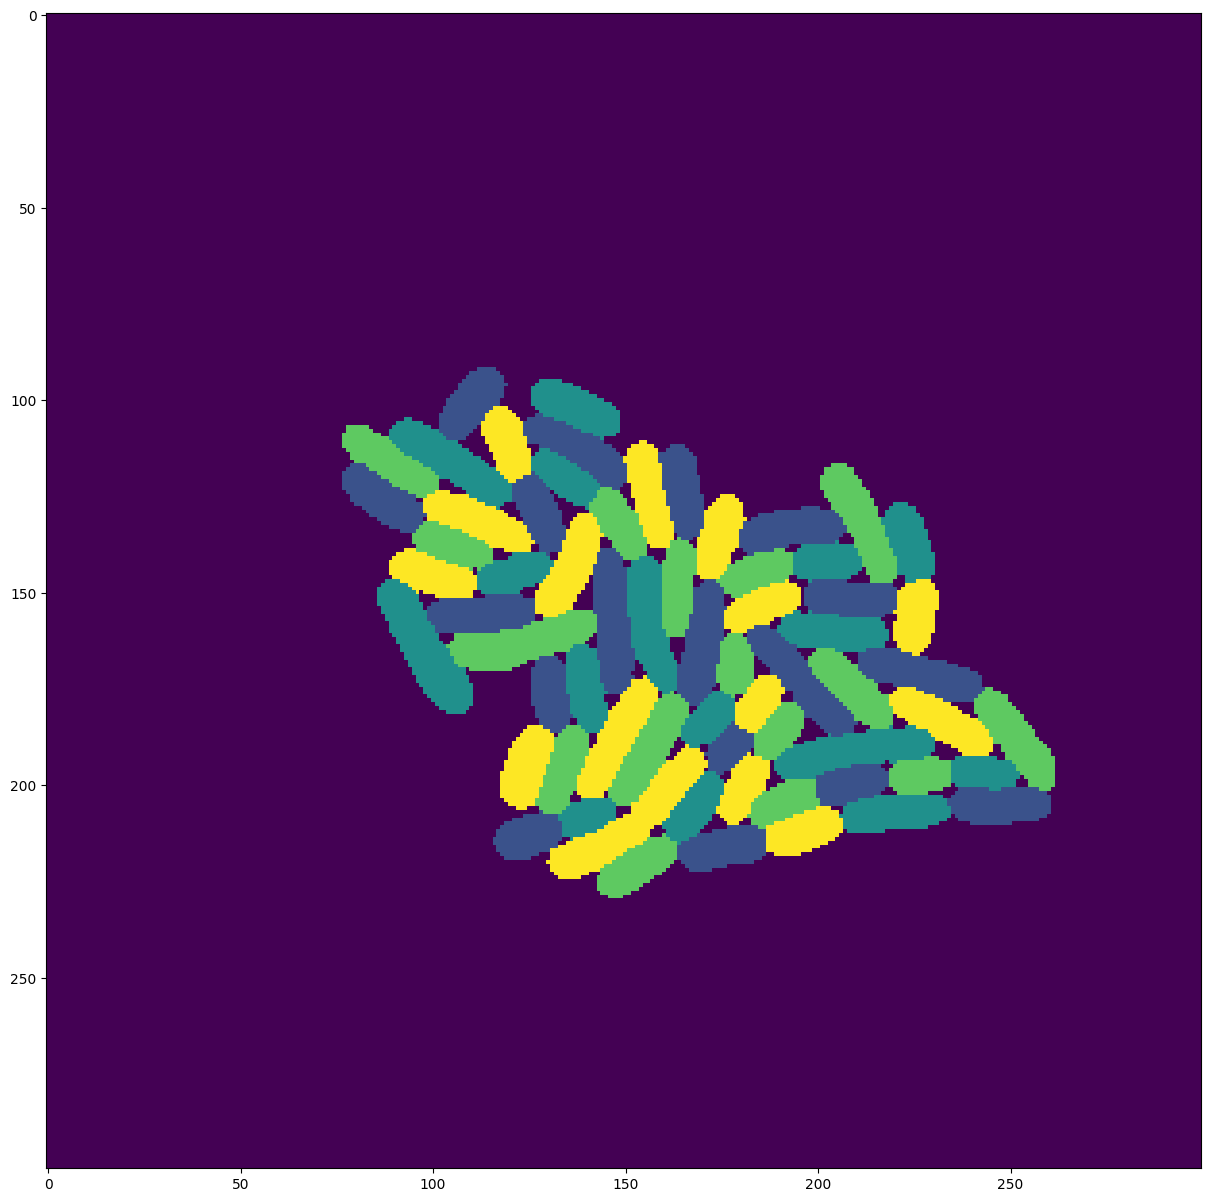

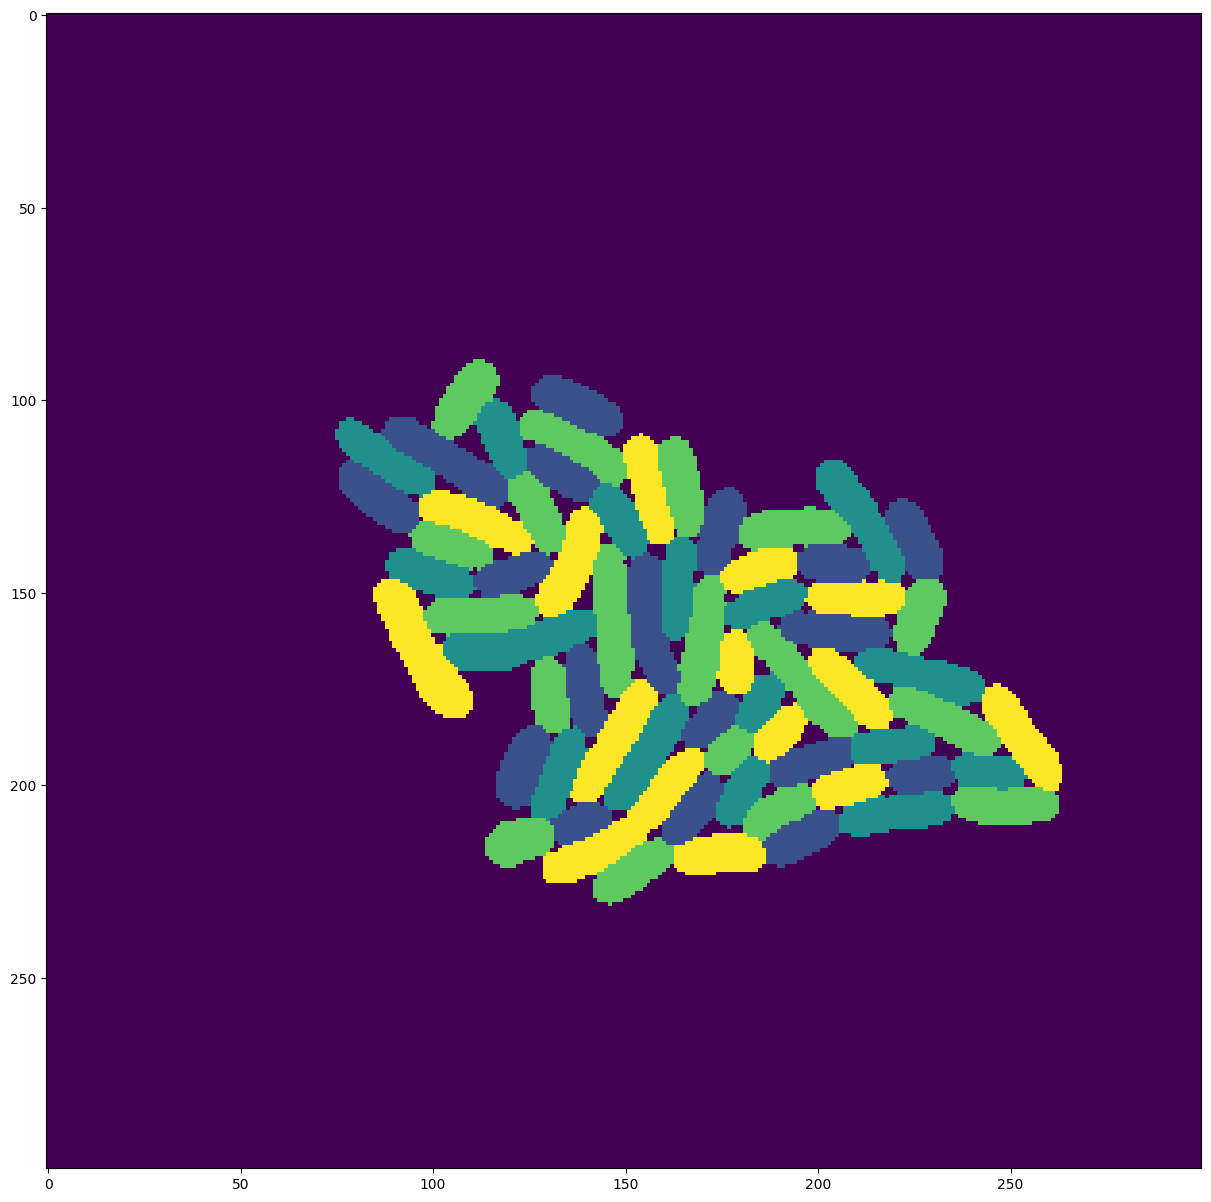

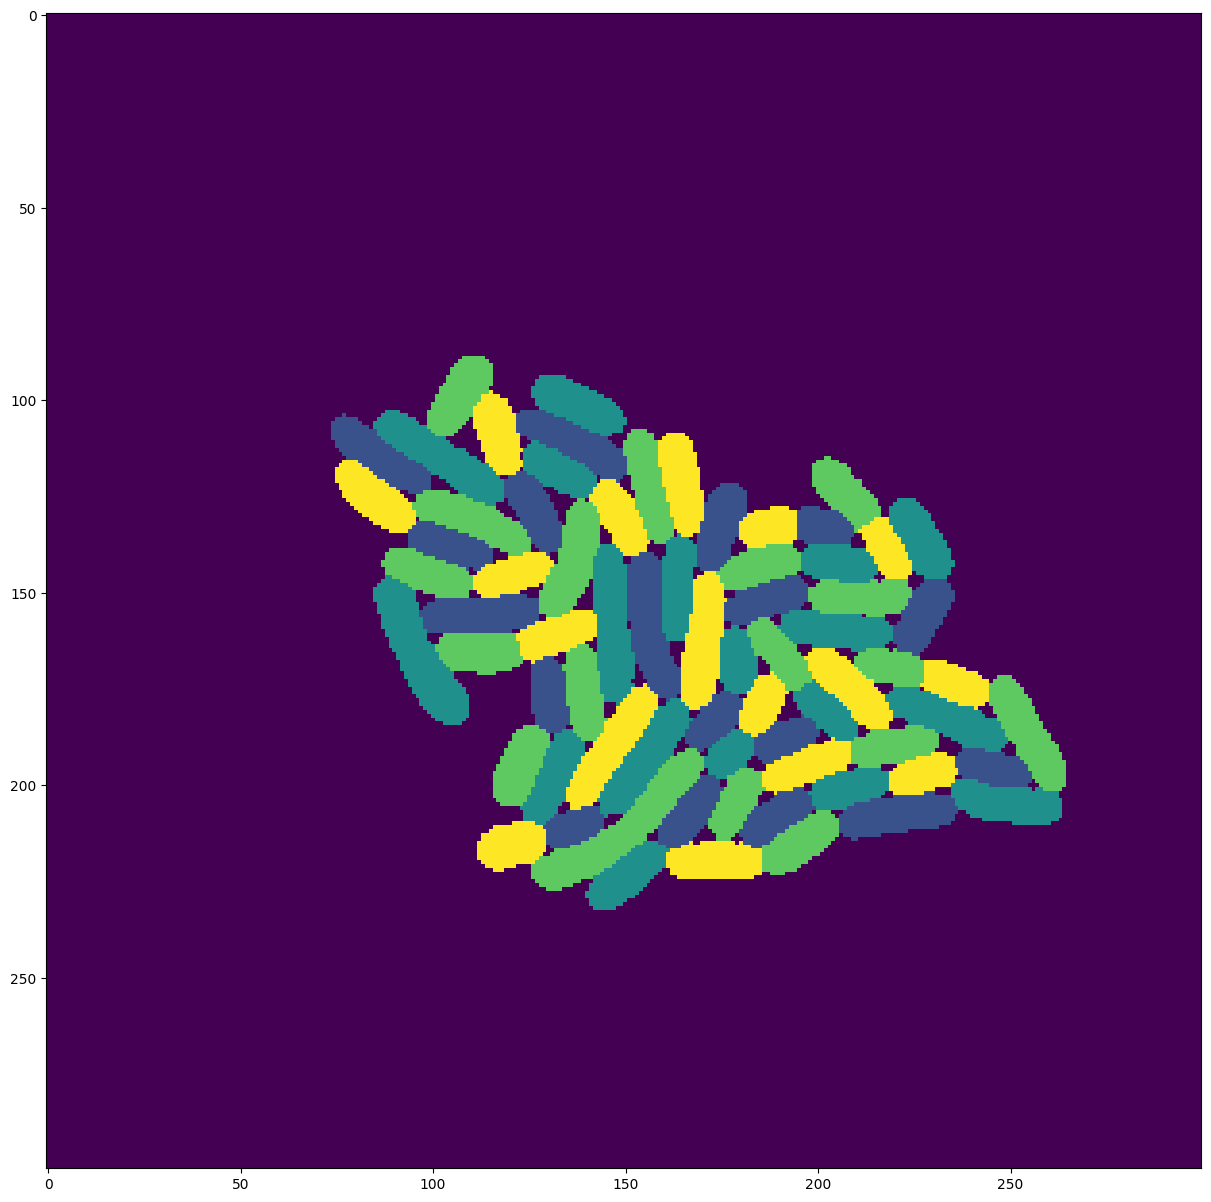

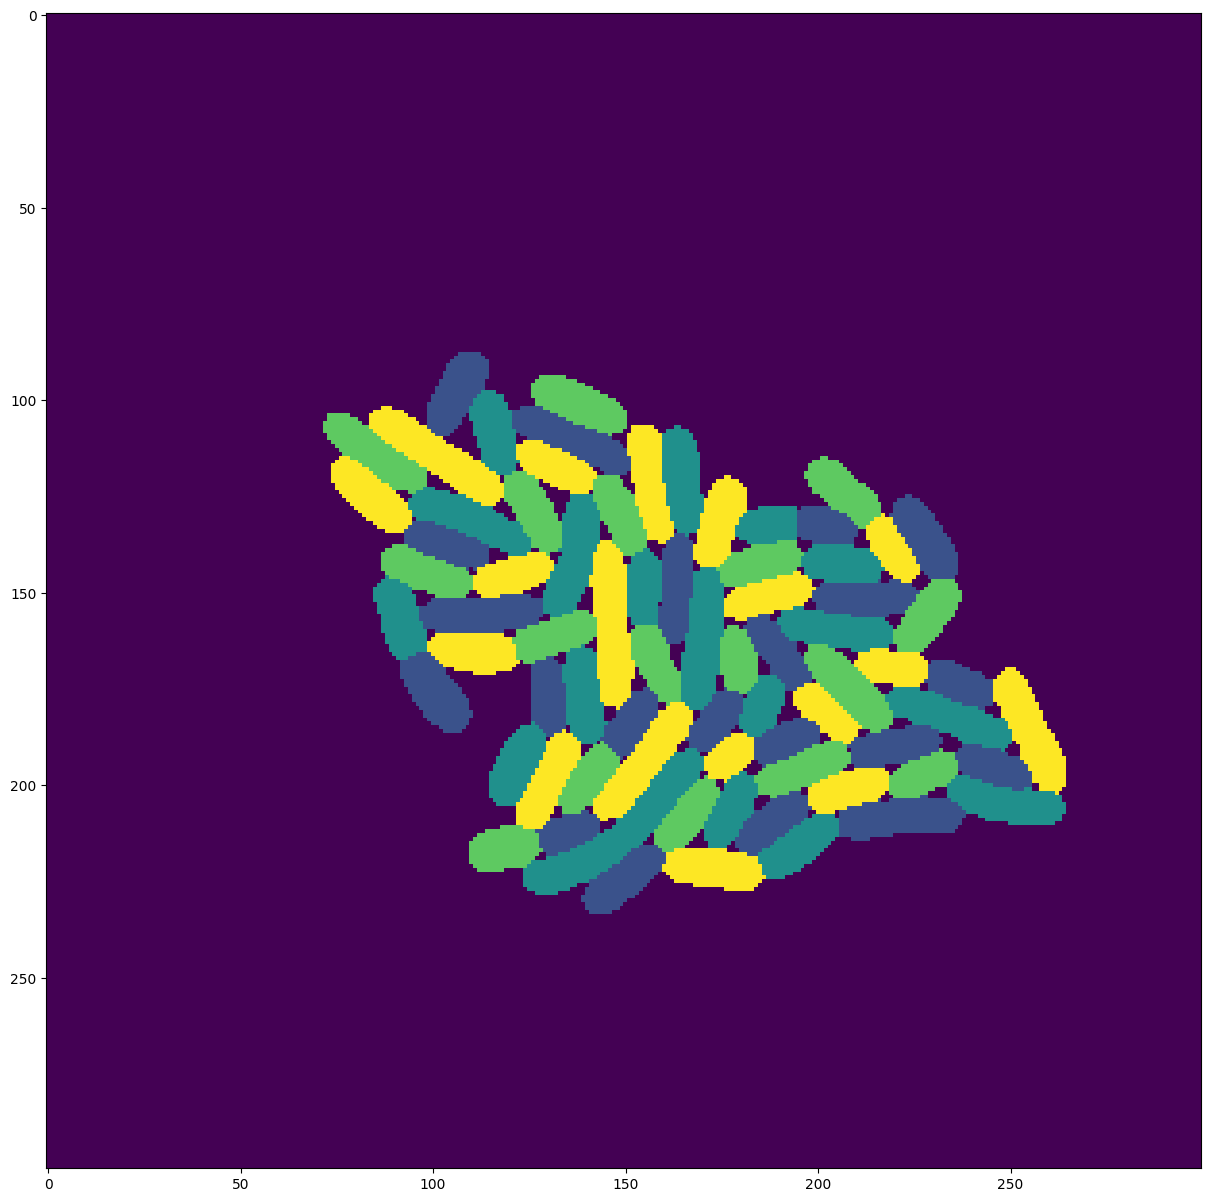

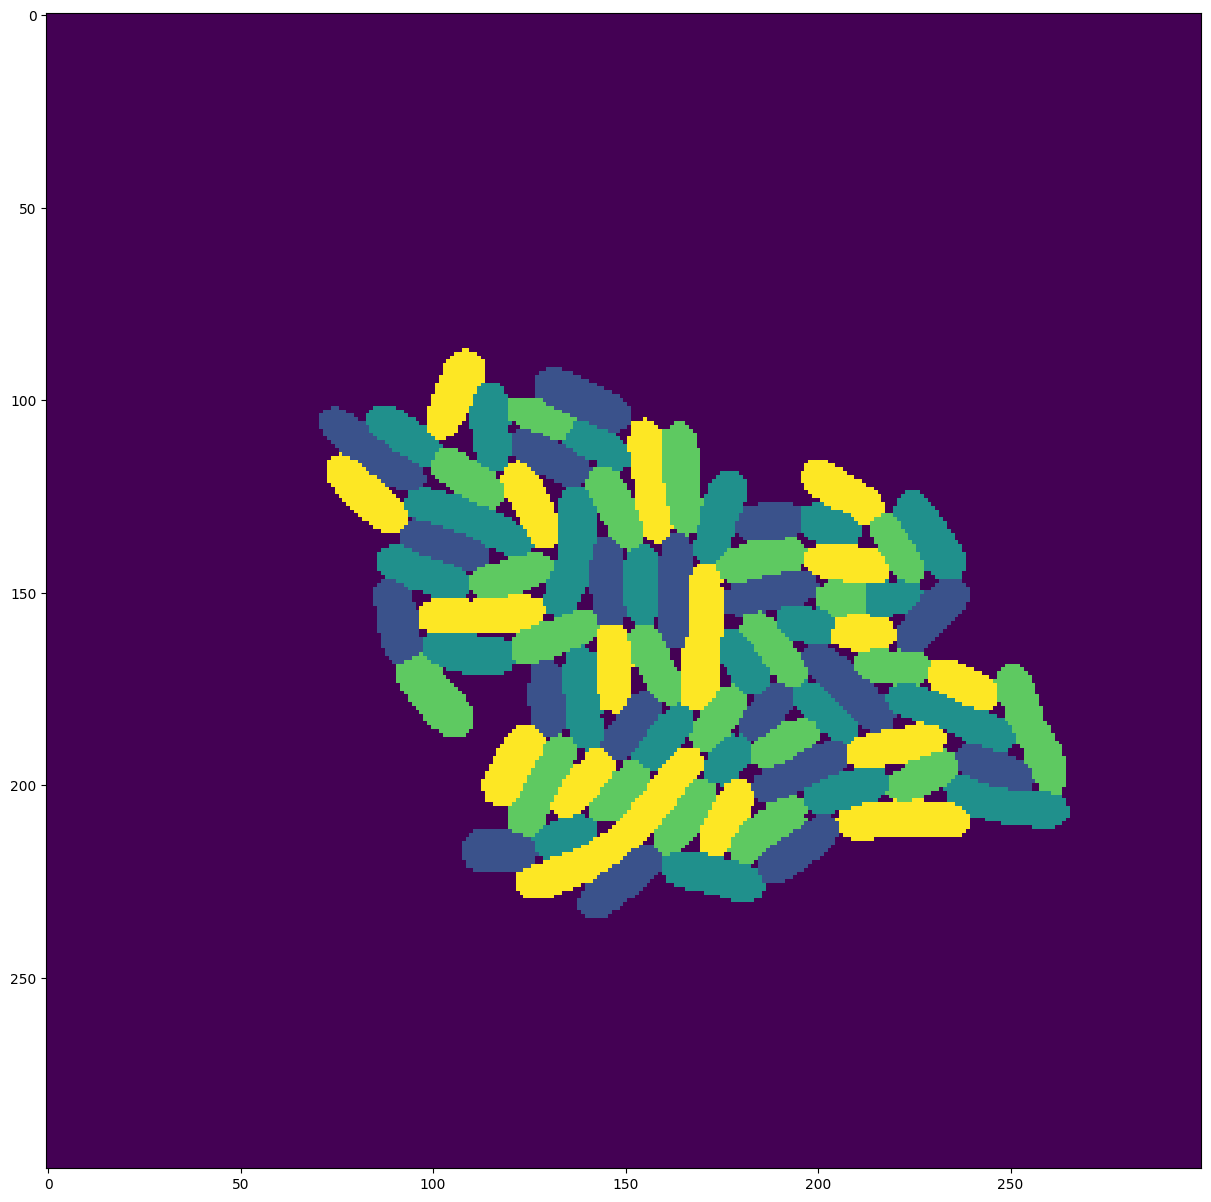

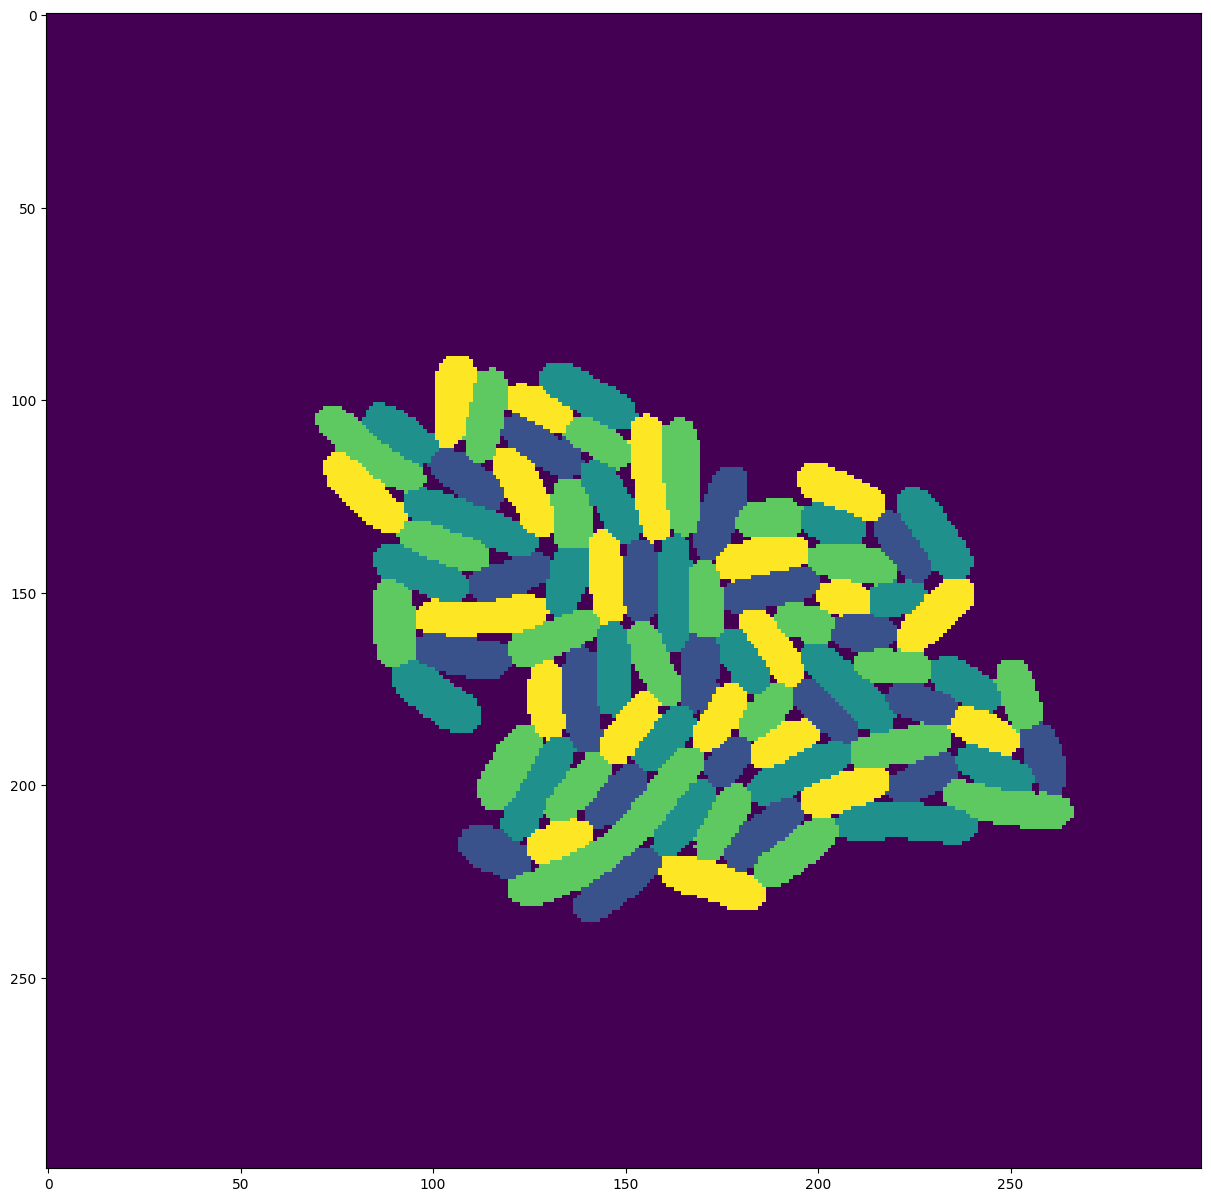

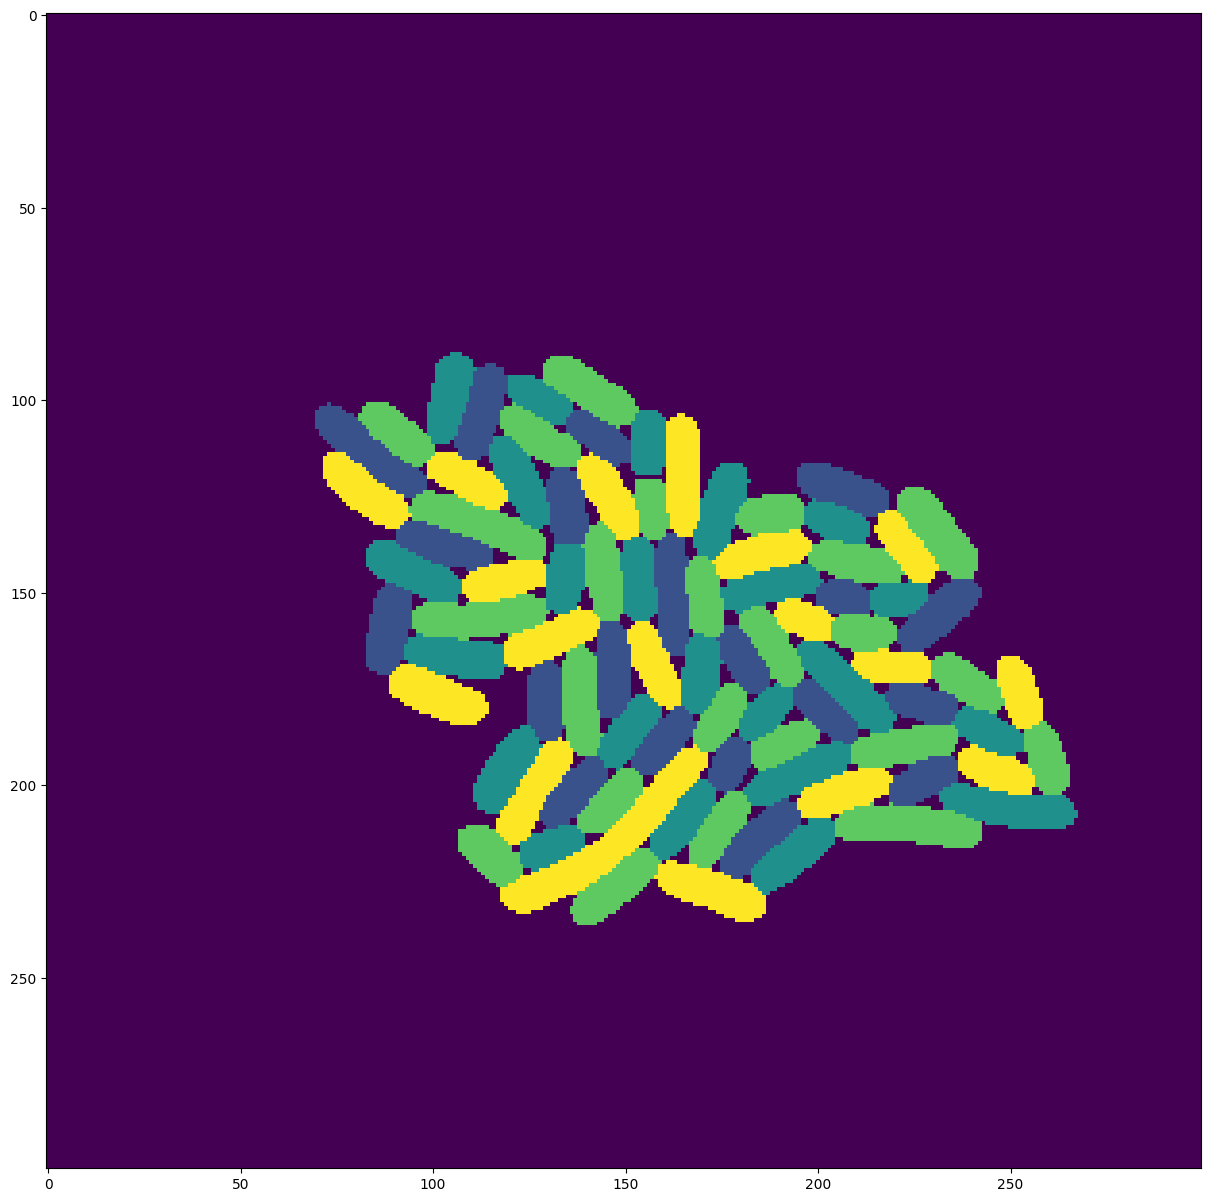

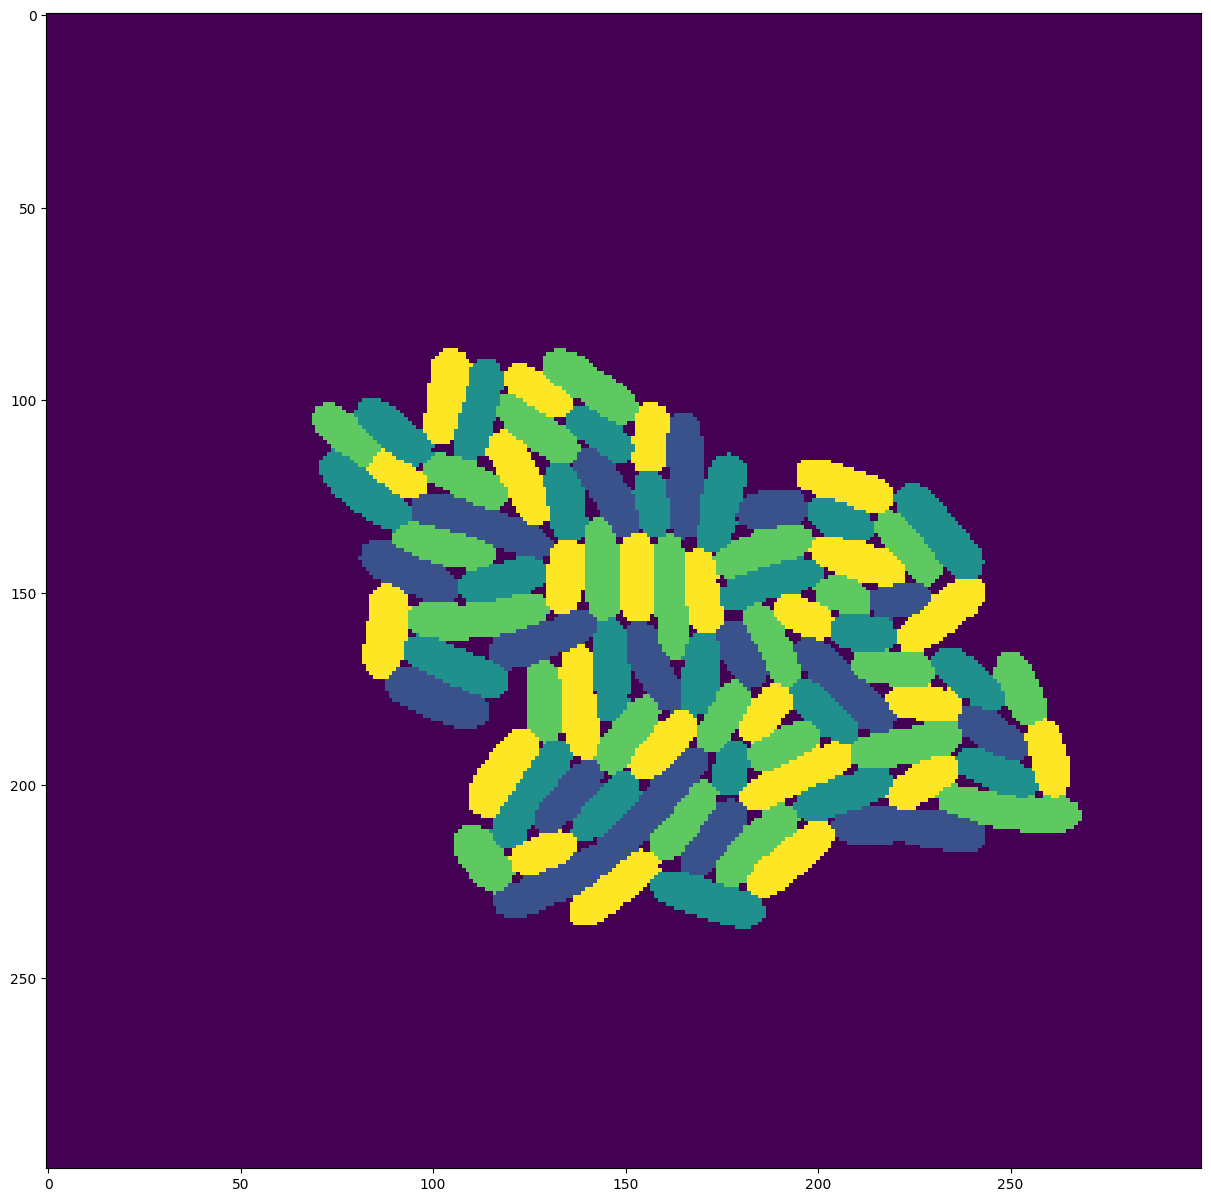

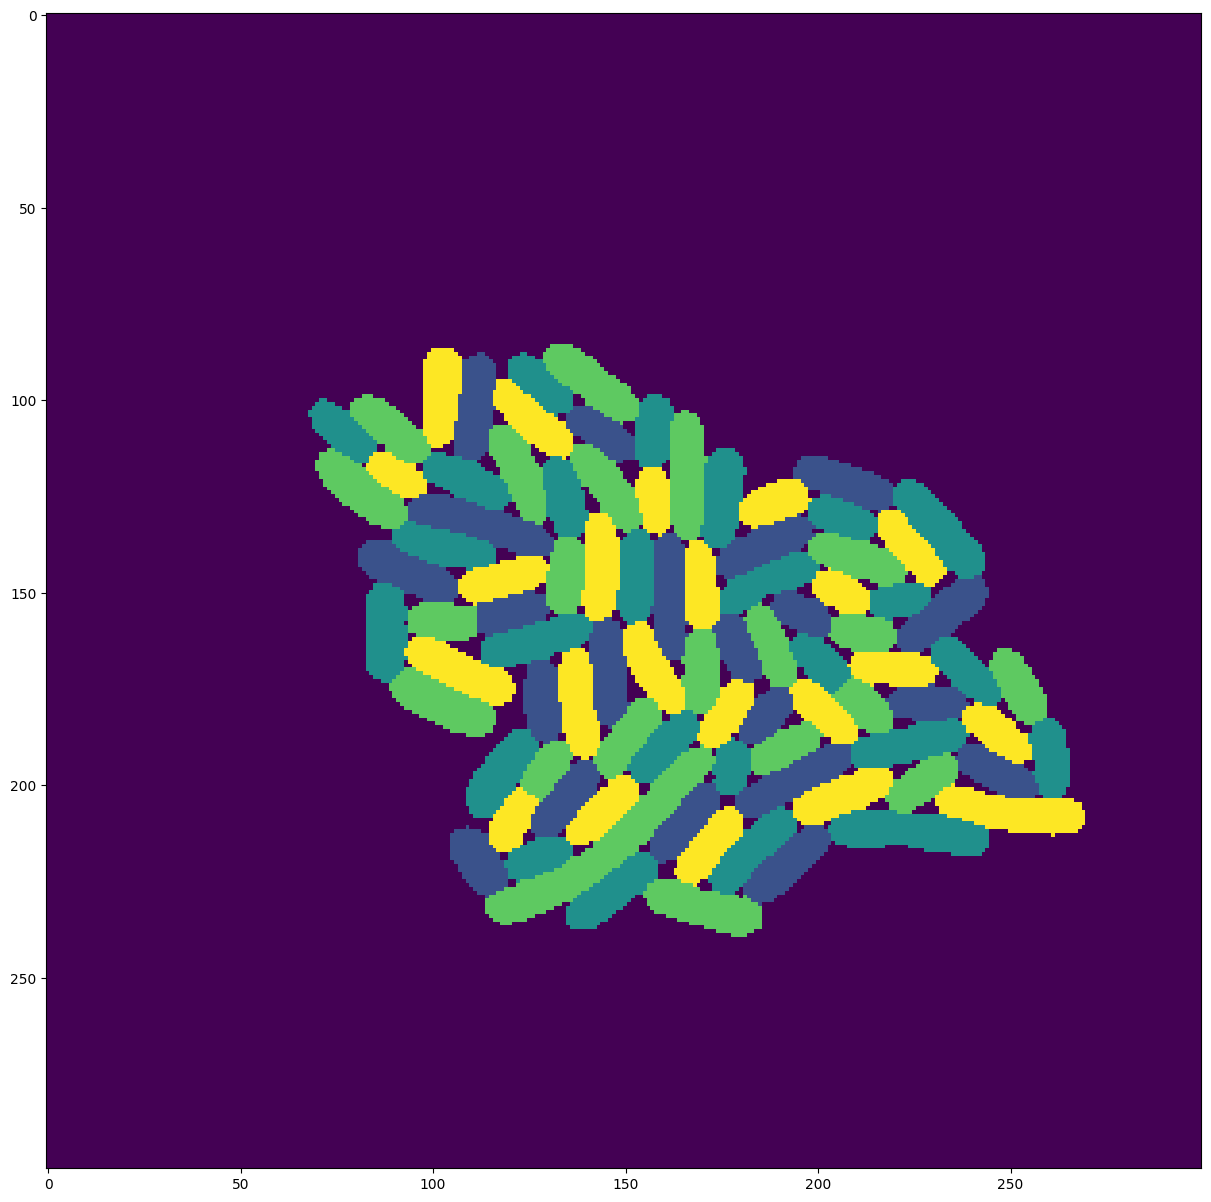

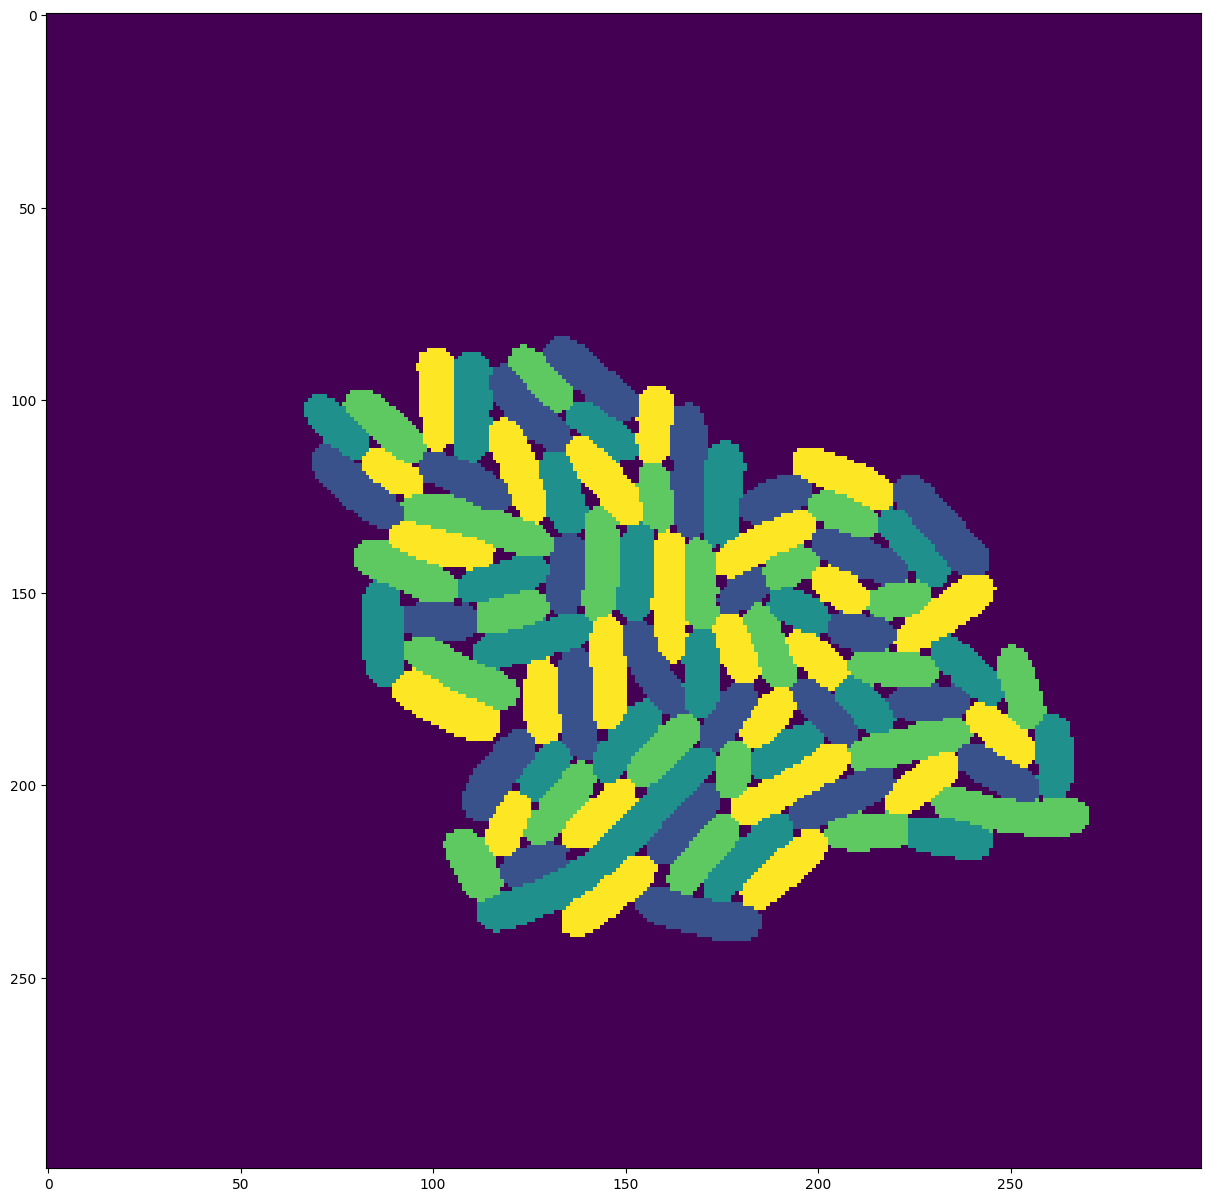

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import ncolor


for hier in hier_arr:
    mask = np.zeros((300,300))
    #print(len(hier.all_nodes()))
    for node in hier.all_nodes():
        if node.index in set(n):
            coordinates = node.value
            x_coords, y_coords = coordinates[:, 0], coordinates[:, 1]
            # Set pixels at specified coordinates to 1
            mask[y_coords, x_coords] = node.index

    ncolor_masks = ncolor.label(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(ncolor_masks)
    plt.show()

In [4]:
total_num

4627

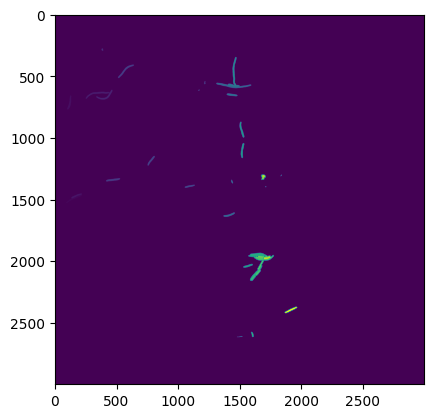

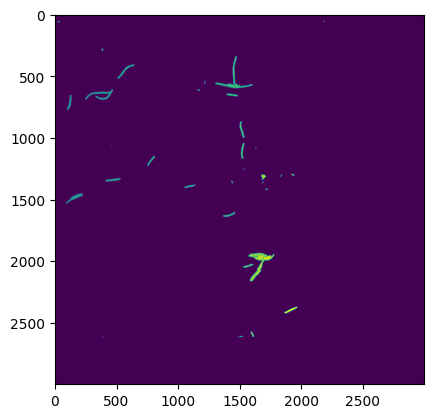

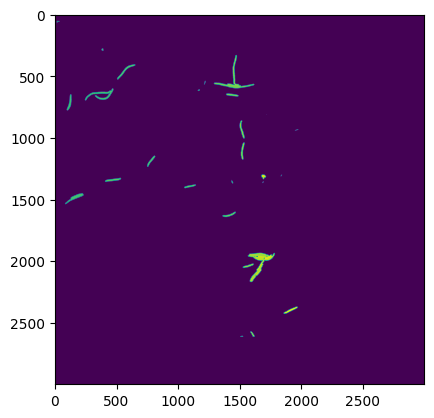

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for hier in hier_arr:
    mask = np.zeros((3000,3000))
    #print(len(hier.all_nodes()))
    for node in hier.all_nodes():
        coordinates = node.value
        x_coords, y_coords = coordinates[:, 0], coordinates[:, 1]
        # Set pixels at specified coordinates to 1
        mask[y_coords, x_coords] = node.index

    plt.imshow(mask)
    plt.show()

In [ ]:
from collections import deque
queue = deque([1])
queue.extend([])



In [ ]:
for element in queue:
    print(element)

In [ ]:
len((3,4,5,6,6))

In [ ]:
from core import process, ModelEnum
process("/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase")

In [ ]:
from scipy.sparse import coo_matrix

# Example COO matrices with different coordinate ranges
matrix_A = coo_matrix([[1, 2], [0, 3], [-100, 2]])  # Shape: (2, 2)
matrix_B = coo_matrix([[1, 0], [-100, 100], [2, 2]])  # Shape: (3, 2)

matrix_A.shape
# Perform multiplication
result = matrix_A.dot(matrix_B)
# The resulting matrix's coordinate range will encompass the union of the coordinate ranges
print("Resulting matrix shape:", result.shape)
print("Resulting matrix (in COO format):\n", result)


In [ ]:

matrix_B.shape

In [ ]:
from scipy.sparse import coo_matrix

# Example data for mask 1 and mask 2 (Replace this with your actual data)
mask_data_1 = [(0, 0, 1), (1, 1, 1)]  # Example data: (row_index, col_index, value)
mask_data_2 = [(0, 0, 1), (2, 2, 1)]

# Create sparse matrices for masks 1 and 2
mask_1 = coo_matrix((data, (row_indices, col_indices)), shape=(mask_shape_1[0], mask_shape_1[1]))
mask_2 = coo_matrix((data, (row_indices, col_indices)), shape=(mask_shape_2[0], mask_shape_2[1]))

# Calculate overlap
overlap = (mask_1.multiply(mask_2)).sum()


In [ ]:
from scipy.sparse import csr_matrix
import numpy as np

# Function to create a sparse matrix representation of the mask
def create_sparse_mask(mask):
    # Get the non-zero indices of the mask
    nonzero_indices = np.transpose(np.nonzero(mask))
    
    # Extract row and column indices
    row_indices, col_indices = nonzero_indices[:, 0], nonzero_indices[:, 1]
    
    # Create a sparse matrix using Compressed Sparse Row (CSR) format
    sparse_mask = csr_matrix((np.ones(len(row_indices)), (row_indices, col_indices)), shape=mask.shape)
    
    return sparse_mask

# Function to calculate the overlap between two sparse masks
def calculate_overlap(mask1, mask2):
    # Multiply the sparse matrices to find the intersection
    intersection = mask1.multiply(mask2)
    
    # Calculate the number of overlapping pixels
    overlap_count = intersection.sum()
    
    return overlap_count

# Example masks (replace these with your actual masks)
mask1 = np.array([
    [1, 0, 1],
    [0, 0, 0],
    [0, 0, 0]
])

mask2 = np.array([
    [1, 0, 1],
    [0, 0, 0],
    [0, 0, 0]
])

# Create sparse representations of masks
sparse_mask1 = create_sparse_mask(mask1)
sparse_mask2 = create_sparse_mask(mask2)

# Calculate overlap between the masks
overlap = calculate_overlap(sparse_mask1, sparse_mask2)
print("Overlap between the masks:", overlap)


In [ ]:
[2,3,4] == [3,4,2]

In [ ]:
set = ()

In [ ]:
sub_coords = np.array([[1, 2], [2, 3], [2, 4], [1, 3]])
bound = np.vstack((np.min(sub_coords, axis=0), np.max(sub_coords, axis=0)))


In [ ]:
sub_coords = np.array([[-10, -1], [-10, -2], [-2, -4], [-1, -100]])
bound2 = np.vstack((np.min(sub_coords, axis=0), np.max(sub_coords, axis=0)))

In [ ]:
bound

In [ ]:
bound2

In [ ]:
def check_overlap(box1, box2):
    # Check for overlap in each dimension
    for i in range(len(box1)):
        # Check if the boxes overlap in the ith dimension
        if box1[i][1] < box2[i][0] or box1[i][0] > box2[i][1]:
            return False  # No overlap in this dimension
    
    return True  # Overlap in all dimensions

In [ ]:
check_overlap(bound, bound2)

In [ ]:
set(sub_coords)

In [3]:
from mip import Model, CBC

In [4]:
import gurobipy as gp
from gurobipy import GRB

ModuleNotFoundError: No module named 'gurobipy'